# Decision Trees

## Data Dictionary:

Columns:

*   **Age**
*   **Sex**
*   **BP**
*   **Cholesterol**
*   **Na_to_K**
*   **Drug**

'Drug' is our target variable

In [1]:
# Import necessary libraries
import sys
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree

In [2]:
# Load data
df = pd.read_csv('drug200.csv')
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [3]:
# Check DF size/shape
df.shape

(200, 6)

## Preprocessing

In [4]:
# Select Columns for Feature Matrix
x = df[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values

In [5]:
# Normalize Data using sklearn preprocessing
from sklearn import preprocessing


# Convert categorical variables into dummies
le_sex = preprocessing.LabelEncoder()
le_sex.fit(['F','M'])
x[:,1] = le_sex.transform(x[:,1]) 


le_BP = preprocessing.LabelEncoder()
le_BP.fit([ 'LOW', 'NORMAL', 'HIGH'])
x[:,2] = le_BP.transform(x[:,2])


le_Chol = preprocessing.LabelEncoder()
le_Chol.fit([ 'NORMAL', 'HIGH'])
x[:,3] = le_Chol.transform(x[:,3]) 

x[0:5]


array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.114],
       [28, 0, 2, 0, 7.798],
       [61, 0, 1, 0, 18.043]], dtype=object)

In [6]:
# Fill target variable
y = df['Drug']
y[0:5]

0    drugY
1    drugC
2    drugC
3    drugX
4    drugY
Name: Drug, dtype: object

# Creating Decision Tree:

In [7]:
# Import train_test_split library
from sklearn.model_selection import train_test_split

In [8]:
# Split test/train data: 70% for training, 30% for testing
x_trainset, x_testset, y_trainset, y_testset = train_test_split(x, y, test_size=0.3, random_state=3)

In [9]:
# Sanity check for dimensional accuracy
print(' X training set: {}'.format(x_trainset.shape),'\n','Y testing set: {}'.format(y_trainset.shape))
print(' X testing set: {}'.format(x_testset.shape),'\n','Y testing set: {}'.format(y_testset.shape))

 X training set: (140, 5) 
 Y testing set: (140,)
 X testing set: (60, 5) 
 Y testing set: (60,)


## Modeling:
DecisionTreeClassifier
criterion="entropy" so we can see the information gain of each node.

In [10]:
# Create DecisionTreeClassifier, specifying criterion='entropy' to view information gain with each node
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
drugTree

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [11]:
# Train and fit model
drugTree.fit(x_trainset,y_trainset)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

## Predictions:

In [12]:
#Generate predictions
predTree = drugTree.predict(x_testset)

In [13]:
# View result values
print(predTree [0:5])
print(y_testset [0:5])

['drugY' 'drugX' 'drugX' 'drugX' 'drugX']
40     drugY
51     drugX
139    drugX
197    drugX
170    drugX
Name: Drug, dtype: object


## Evaluate Model:

In [14]:
# Import necessary libraries
from sklearn import metrics
import matplotlib.pyplot as plt

In [15]:
#Check tree accuracy
tree_accuracy = metrics.accuracy_score(y_testset, predTree)
print("DecisionTrees's Accuracy: ", tree_accuracy)

DecisionTrees's Accuracy:  0.9833333333333333


## Visualize

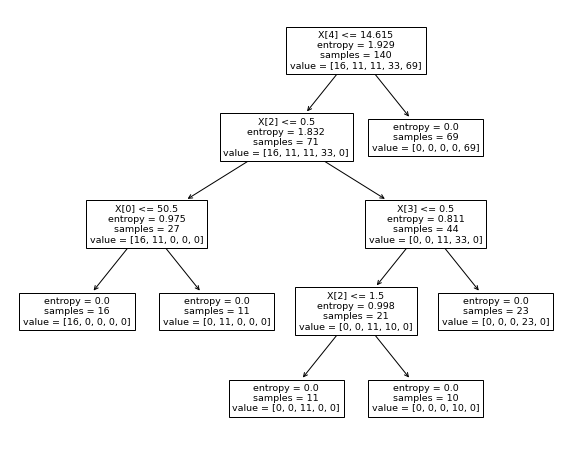

In [16]:
plt.figure(figsize=(10,8))
tree.plot_tree(drugTree)
plt.show()